Imports

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
import sys

# for relative imports to work in notebooks
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# see https://www.kaggle.com/code/ankitjha/practical-deep-learning-using-pytorch

Load dataset

In [22]:
# load data set
images = np.load('../data/sign_lanuage_digits/X.npy')
labels = np.load('../data/sign_lanuage_digits/Y.npy')

Visualization 

Image size:  (64, 64)


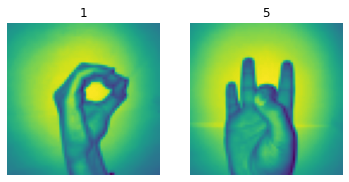

In [26]:
img_size = 64

# images to plot
image_1 = 205
image_2 = 1110

plt.subplot(1, 2, 1)
plt.imshow(images[image_1].reshape(img_size, img_size))
plt.title(np.argmax(labels[image_1]))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(images[image_2].reshape(img_size, img_size))
plt.title(np.argmax(labels[image_2]))
plt.axis('off')

# print image size
print("Image size: ", images[image_1].shape)

Import model

In [24]:
from torchvision import models
from torchsummary import summary

# convnext: https://arxiv.org/abs/2201.03545
vgg = models.mobilenet_v3_large().cuda()
summary(vgg.cuda(), (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
         Hardswish-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]             144
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 16, 32, 32]             256
       BatchNorm2d-8           [-1, 16, 32, 32]              32
  InvertedResidual-9           [-1, 16, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]           1,024
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 16, 16]             576
      BatchNorm2d-14           [-1, 64,